### <a id='0'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Customer Analysis</h2></a>

<h3>Overview:</h3>
I have structured the data modelling into 5 key sections. Below, I will share with you the steps I took together with insights for each section.

1. Introduction
2. Data Understanding
3. Data Preparation
4. Exploratary Data Analysis
5. Modelling,Evaluation and Prediction

### <a id='1'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">1. Introduction</h2></a>

In [0]:
pip install yellowbrick

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4bf58604-36f1-4754-8503-d56157cfb2a4/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install missingno

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4bf58604-36f1-4754-8503-d56157cfb2a4/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install imblearn

Python interpreter will be restarted.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Not uninstalling scikit-learn at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-4bf58604-36f1-4754-8503-d56157cfb2a4
    Can't uninstall 'scikit-learn'. No files were found to uninstall.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4bf58604-36f1-4754-8503-d56157cfb2a4/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

### <a id='2'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">2. Data Understanding</h2></a>

In [0]:
userJsonPath = "/FileStore/tables/Project_Data_Extract/users.json"
users_DF = (spark.read.option("inferSchema", True).json(userJsonPath))
users_DF.display()

average_stars compliment_cool compliment_cute compliment_funny compliment_hot compliment_list compliment_more compliment_note compliment_photos compliment_plain compliment_profile compliment_writer cool elite fans friends funny name review_count useful user_id yelping_since 3.85 2541 361 2541 1710 147 163 1212 323 5691 190 815 11291 2006,2007,2008,2009,2010,2011,2012,2013,2014 1357 xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg, gUfHciSP7BbxZd5gj-c4xw, NXw0bCLF5ZtFMfhcj7CFSw, OGjmMxPuIoLTJ3O-CO2A4g, mwUcJP11UkIjCB8jBAaS3g, fDmgb3Vi3-f_MtFOImH0Ug, -x1516ZG5GllZiBjDQlRkA, tx5UcfGrsud-CQdq8p8KKw, HKooPGsHiZV_0vTn45fG_w, 2iSBJHVMNsolJ3AH1g_D7A, NcoP47QP_eMVtoZvinwU-w, XPOx-mCubVGQ1rRknztFtw, K6Tbv3a_qUQK0ed4T0_u5Q, _dUWTJf0faMXMdr_RFW5Xw, 5ni2bacPC7scIAHAb9DmlQ, cG-UHRz9QdhBEBz3R_8X0Q, BPh-OMqPul6HXsnCHxsk6g, mgzNtI5XOuPwwukp6yh1Vw, pMbWlP0cAvtRSFMI-8mvaw, yf-DODoyVwAh3OQYaRIzzg, nnImk681KaRqUVHlSfZjGQ, AH3SMQ4HwttTUvqvkieMxA, RZwjMDvgVUi3yJdJofziJQ, 8Zocr6jVED5JQEBvqwEBZw, 02r6AiM9aNUpHeCoWsOxYA, pkJvKUjA68vnDFhJh1gHEg, cPqZKGcKhioqRZeokvV0cQ, LX4BsaXflALTvTDnft_6FA, dw2T8SFAU3f1MjN-zOaS7w, BUB_t_Rvzs1yPEzZipkWjw, 9p9-1hlmpNl6otWYujJDYw, Z0C_AdA4vJwzrg1Fe4yddg, YoLuCwckCU7nrH807XWCQw, RKT1rPAoiLJgXcEflvJ95Q, 71-vm7Jzxat9t42mX1IaKw, rcU7ysY41qGppbw4pQgjqg, q5K-aNiLiksURl7lphjhoA, XT8MsOIh6_zZ0-d0VaqZLg, rk3deA0rPWqjH5ylNK2y4g, hvPjekutiRbkVJPKkUKT9g, lfAATwK7-luzRpXNwnHbfQ, tC6o9xPdWVvyxL4MmEXPdQ, xNJlwYz_tEXkaYxP1HI2mg, Z5dJR6fe-X0Zhn7aO3_ZTw, my2T74Ifjz0eR_RE1Neb4A, is3csVBxWVTE_CrQ2-argg, S5WQcThM04eH7Eu0YJ1a1Q, tPyC_7oMmNnhynw0HntyRA, m_y6jQ5AeVpXfTSc9c_LEQ, JH7UxS7w2fI6pNxup2y73Q, Uki-1q5A2p7pC19KpXsGag, 3QCkc8tpBK9cDYorKqvahw, aoeMo0aVDmbKByUNXKr9pg, pnU0L7MWAKf-FlITzfVNxg, 1Y5sVYKQACmepTltxEby2A, xlklAS3yeN5DHN3zHA75gQ, z1fFMZ3BFGGSMlUjfq8ZQA, ci7Q6NvXQ8UZrBHusVX18g, 8aZifkcVB7AwJC2uPpGomg, qWjC1QQPtz2uMT6mlWHUKQ, pu07bPV3wW1VCc0cwtr4vg, ciGU5fy1KclSNx5qRjc01Q, 6VbFaYbtITwMzuCOj8567A, IvqEWGUeBgdRiPyvQckIGA, Bchgh1l6l_qRiRc1M5eIHw, F6glGg2elw1dN1JJzf-sPg, MbGeVeZWu653SR_Gu1FgAw, 9_v7GlnIikGwvoMC9LUYkQ, CU1XWxrVM6U3UiSgMRV0ZA, QyLp-2pVJMcpaM8wR4VTVw, bT4Fr7znbPBCpC-pILtbmw, nKjUdubz0NmReVF8Q_5UwQ, PoS7_OQE4AOEXjfZ3447pQ, RHCZzyfypt6Sff3KoF6pgA, JNz5hAhVLr8uacC3h5jLkQ, SzuILN_N2_32YWA8nRe96w, wRAy5X8K7uvq5uQDEgVOLg, djQcFeW5zKq1bG44Ip0RZg, 1dLDRBXBECCGC0nAGeCDdQ, g7TEQ34Sz2z7Pxr67KtwXA, b_a5icXGK-AXVYZKehgKLw, H6BYn5MssX2dcIXcglQTow, ba0re-NUWaNvn5hxItLpEg, tG95mAdxytI5PHQRGEaLfA, G0FGeAGBj7IUFgCidXaSqg, uKRKr3-dLWQdaHUqDHPImQ, OhHAMKB86xi8CZjpZNtxhg, 56R3raK9IJEFd5srS8LlKw, oyFBkCKjALTJ1LTSLUyirw, yTOnngBu3nNt7f1e4LF1QQ, dsZKvd8xe0Q2nivlJd_8iA, jLQzrJ9DrfSQJ-wVe0Iw1w, -Owz5Kw52teazejmDkSHkg, lBOsZyBrcmYsDrVu4t-k1Q, GKVvfAGVLfaKN3QJj4Kvsw, PxdoQkTMaeDcHnAhwUiNjw, JXVFeJtxlHp3vmrd-XgvFA, q452w0-GepXlqZTen7QVIQ, 7FdCfHIAV44yLMQ7DddAjA, feQNw7R1CPriBoAPcOmSTA, -OwdoTvqWu1kaZfc887fBg, E7cRrrsiFZlQWkVmViq75Q, VnmVTEsmQ2aBeY4XuLyvig, no1Eg9lva-cgTTVX4s46dA, ZIKS_rlVkcoQOWifqC84XA, BjpIebCmaccXh41gN52Xww, UsXqCXRZwSCSw0AT7y1uBg, M8DWB0oq8LfNDe4OzG4OBQ, wZPizeBxMAyOSl0M0zuCjg, MPr-ppv6loSH_3sXaSk72w, qK3XSBDoRpf-zkvTHGze6w, oCKBnlJ3cU7Ev4MKLLV4SA, oTguCKj6Wvl2Sn5TGRyj5A, VFJmCTvwyjfAtGvkb0tLbQ, tlb5Ug4dPqz7EzUXNFc3pA, qruOUB36ZPf9zztkemL2pw, 5oR48O0j9-uGk4AceKIFlw, C2SBmB4hKSjuRC79QPSwEw, jea0GjnsCuSsoVrCX010dA, Db8DPbnw20ySG3h1elcqHA, xsBjO0GTAvZK8i2A8_z20g, P2fXcmsU_vrs4zB2IfsHnQ, _yrvI3PPZf_zmgZyGSgCew, mYqGpVKiUESnXlVNefzw1Q, ltKOdvD0mQ0i-pRlbV75xg, -27yBEa-_2LpQvVegupazQ, Vj6waVhIVS-G1LmQphQpww, zJMFklcAyZSEBYV3jHz-9g, nfAjhCrtILEr32lR3z3OQw, B75woOWwO-oDVROhHR_4NQ, l6j6RLj9nESSa-6yEcW8ng, LouDA17U0tHIt4YuNAUiYA, ybNyW8JplCGiFmdeyTd_7Q, arGPm0-7FMqnaBZVDigIug, W3fBQkb9DNhOO8LfqqN-DA, ygtawqlsxv18xK3UHcczYw, nGbmtNlL1dSnkFGrfGxoag, ZudpHn8s6DiGEOGwWSZOIQ, Ff3zxD71rs9NtY4637Gk_w, v6U8rUdoFrkSGSmm4yk-Mw, R8QIU8vRH_jJU2Gq5FlMAA, Zcr90BeQ8QWV32XIqpH82A, CF9jfr_ukYa2FFRiXu5Plg, FOoupO0sjghVuGt73KVa7A, Lx65SHV9SCSR6mcA8-_LIA, wJHi66YaiFg3dqrRsm4AbQ, j1IpRoDB4_EGalcFItxCxg, kSasjiC96l_nNWKCx9bjWQ, fHS0bQ-l5rHME_xXKQSYXQ, dciUI0nndBenXrD

In [0]:
users_DF.printSchema()


root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



In [0]:
user_pdf=users_DF.toPandas()

In [0]:
user_pdf.shape

### <a id='3'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3. Data Preparation</h2></a>

In [0]:
user_pdf.isnull().sum()

In [0]:
user_pdf.dtypes

### Add columns

In [0]:
import pandas as pd
elite_count = [0 for _ in range(user_pdf.shape[0])]
for i in range(user_pdf.shape[0]):
    elite_count[i] = len(user_pdf.loc[i, "elite"].split(","))
    
elite_count = pd.DataFrame(elite_count)
# print(elite_count)
user_pdf['elite_count'] = elite_count  # Add column to user_pdf
user_pdf = user_pdf.drop(["elite"], axis=1) # Drop elite
user_pdf.head()




In [0]:
user_pdf['yelping_since'] = pd.to_datetime(user_pdf['yelping_since'])

user_pdf['yelp_since_YRMO'] = user_pdf['yelping_since'].map(lambda x: 100*x.year + x.month)
user_pdf['yelp_since_year'] = user_pdf['yelping_since'].dt.year

user_pdf.head()




In [0]:
# Column to store whether compliment has been tagged
tagged_compliment = [0 for _ in range(user_pdf.shape[0])]
for i in range(user_pdf.shape[0]):
    if sum(user_pdf.iloc[i, 1:12].values) > 0:
        tagged_compliment[i] = 1
        
tagged_compliment = pd.DataFrame(tagged_compliment)
user_pdf['tagged_compliment'] = tagged_compliment




In [0]:
# Make column friend_count = number of friends
friend_count = [0 for _ in range(user_pdf.shape[0])]
for i in range(user_pdf.shape[0]):
    friend_count[i] = len(user_pdf.loc[i, "friends"].split(","))
    
friend_count = pd.DataFrame(friend_count)
# print(friend_count)

# Add column friend count column to main db
user_pdf['friend_count'] = friend_count

# Drop column friends as not used again
user_pdf = user_pdf.drop(["friends"], axis=1)
user_pdf.head()



### Merge with business and tips dataset

In [0]:

biz_DF = (spark.read
  .option("inferSchema", True)
  .json("/FileStore/tables/Project_Data_Extract/business_filtered.json"))
biz_DF.display()

address attributes business_id categories city hours is_open latitude longitude name overall_stars postal_code review_count state 921 Pearl St {"RestaurantsTableService":"True","WiFi":"u'free'","BikeParking":"True","BusinessParking":{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False},"BusinessAcceptsCreditCards":"True","RestaurantsReservations":"False","WheelchairAccessible":"True","Caters":"True","OutdoorSeating":"True","RestaurantsGoodForGroups":"True","HappyHour":"True","BusinessAcceptsBitcoin":"False","RestaurantsPriceRange2":"2","Ambience":{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True},"HasTV":"True","Alcohol":"'beer_and_wine'","GoodForMeal":{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False},"DogsAllowed":"False","RestaurantsTakeOut":"True","NoiseLevel":"u'average'","RestaurantsAttire":"'casual'","RestaurantsDelivery":"None"} 6iYb2HFDywm3zjuRg0shjw Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries boulder {"Monday":"11:0-23:0","Tuesday":"11:0-23:0","Wednesday":"11:0-23:0","Thursday":"11:0-23:0","Friday":"11:0-23:0","Saturday":"11:0-23:0","Sunday":"11:0-23:0"} 1 40.0175444 -105.2833481 Oskar Blues Taproom 4.0 80302 86 CO 7000 NE Airport Way {"RestaurantsTakeOut":"True","RestaurantsAttire":"u'casual'","GoodForKids":"True","BikeParking":"False","OutdoorSeating":"False","Ambience":{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True},"Caters":"True","RestaurantsReservations":"False","RestaurantsDelivery":"False","HasTV":"False","RestaurantsGoodForGroups":"False","BusinessAcceptsCreditCards":"True","NoiseLevel":"u'average'","ByAppointmentOnly":"False","RestaurantsPriceRange2":"2","WiFi":"u'free'","BusinessParking":{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False},"Alcohol":"u'beer_and_wine'","GoodForMeal":{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}} tCbdrRPZA0oiIYSmHG3J0w Salad, Soup, Sandwiches, Delis, Restaurants, Cafes, Vegetarian portland {"Monday":"5:0-18:0","Tuesday":"5:0-17:0","Wednesday":"5:0-18:0","Thursday":"5:0-18:0","Friday":"5:0-18:0","Saturday":"5:0-18:0","Sunday":"5:0-18:0"} 1 45.5889058992 -122.5933307507 Flying Elephants at PDX 4.0 97218 126 OR 3755 Main St {"GoodForKids":"True","Alcohol":"u'none'","RestaurantsGoodForGroups":"True","RestaurantsReservations":"True","BusinessParking":{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False},"RestaurantsAttire":"u'casual'","BikeParking":"True","RestaurantsPriceRange2":"2","HasTV":"False","NoiseLevel":"u'average'","WiFi":"u'no'","RestaurantsTakeOut":"True","Caters":"False","OutdoorSeating":"False","Ambience":{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True},"GoodForMeal":{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False},"DogsAllowed":"False","RestaurantsDelivery":"True"} D4JtQNTI4X3KcbzacDJsMw Restaurants, Thai vancouver {"Monday":"17:0-21:0","Tuesday":"17:0-21:0","Wednesday":"17:0-21:0","Thursday":"17:0-21:0","Friday":"17:0-21:0","Saturday":"17:0-21:0","Sunday":"17:0-21:0"} 1 49.2513423 -123.101333 Bob Likes Thai Food 3.5 V5V 169 BC 740 S High St {} jFYIsSb7r1QeESVUnXPHBw Breakfast & Brunch, Restaurants columbus {"Saturday":"8:0-14:0","Sunday":"8:0-14:0"} 1 39.947006523 -82.997471 Boxwood Biscuit 4.5 43206 11 OH 100 Clematis Dr {"BikeParking":"True","RestaurantsTakeOut":"True","BusinessParking":{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False},"WheelchairAccessible":"True","DogsAllowed":

In [0]:
biz_pdf=biz_DF.select("*").toPandas()

In [0]:
tipsDF = (spark.read
  .option("inferSchema", True)
  .json("/FileStore/tables/Project_Data_Extract/tips_sentiment.json"))

tipsDF.display()

business_id compliment_count date sentiment sentiment_score text text_basic_cleaned text_lemmatized text_w/o_stopwords user_id ENwBByjpoa5Gg7tKgxqwLg 0 2011-07-22T19:07:35.000Z neutral 0.0 Carne asada chips... carne asada chips List(carne, asada, chip) carne asada chips WCjg0jdHXMlwbqS9tZUx8Q jKO4Og6ucdX2-YCTKQVYjg 0 2014-09-10T07:33:29.000Z positive 0.7097 "Best happy hour from 3pm to 6pm! $1 off martini's on Fridays! ""Nothing but pink"" is delicious!" best happy hour from pm to pm off martinis on fridays nothing but pink is delicious List(best, happy, hour, pm, pm, martini, friday, nothing, pink, delicious) best happy hour pm pm martinis fridays nothing pink delicious 42-Z02y9bABShAGZhuSzrQ 9Bto7mky640ocgezVKSfVg 0 2013-12-13T23:23:41.000Z positive 0.6705 Nice people, skilled staff, clean location - but! I don't think I've ever been taken on time. In 2 years. nice people skilled staff clean location but i do not think I have ever been taken on time in years List(nice, people, skilled, staff, clean, location, think, I, ever, take, time, year) nice people skilled staff clean location think I ever taken time years 5u7E3LYp_3eB8dLuUBazXQ XWFjKtRGZ9khRGtGg2ZvaA 0 2017-07-11T23:07:16.000Z positive 0.7506 "1/2-price bowling & the ""Very"" Old Fashion are excellent, but the drink didn't help my bowling score!" price bowling the very old fashion are excellent but the drink did not help my bowling score List(price, bowling, old, fashion, excellent, drink, help, bowling, score) price bowling old fashion excellent drink help bowling score wDWoMG5N9oI4DJ-p7z8EBg mkrx0VhSMU3p3uhyJGCoWA 0 2016-11-30T08:46:36.000Z positive 0.8689 Solid gold's. Great sauna. Great staff, too. Even at two am! solid golds great sauna great staff too even at two am List(solid, gold, great, sauna, great, staff, even, two) solid golds great sauna great staff even two JmuFlorjjRshHTKzTwNtgg VQftVUvHfMQdDTmnO0iQqg 0 2010-03-22T21:40:26.000Z neutral 0.0 Try a few different styles and instructors of Discover level classes before moving on to the higher levels! try a few different styles and instructors of discover level classes before moving on to the higher levels List(try, different, style, instructor, discover, level, class, move, high, level) try different styles instructors discover level classes moving higher levels MHmKe1NQ1pCpIrbK4XREDw 2PxZ-fICnd432NJHefXrcA 0 2011-10-08T17:14:20.000Z positive 0.8934 On The Border was very fresh and fast for non-fast food chain. The mini-tacos had perfect fresh avocado on them. The black were fabulous on the border was very fresh and fast for nonfast food chain the minitacos had perfect fresh avocado on them the black were fabulous List(border, fresh, fast, nonfast, food, chain, minitacos, perfect, fresh, avocado, black, fabulous) border fresh fast nonfast food chain minitacos perfect fresh avocado black fabulous S5tOE7JAvaeXBEibnAV02g oQyf1788YWsiDLupGva6sw 0 2015-06-09T14:35:57.000Z positive 0.4588 Cold cuts are the best cold cuts are the best List(cold, cut, best) cold cuts best fTsVDajAyDJ-YzsSdfXSDw OQ2oHkcWA8KNC1Lsvj1SBA 0 2018-03-22T15:28:09.000Z neutral 0.0 Water Ave coffee served here--& @ L Jeans! water ave coffee served here l jeans List(water, ave, coffee, serve, l, jean) water ave coffee served l jeans g3HFkZgloxLQCvoJ5Zs5gg Wqetc51pFQzz04SXh_AORA 0 2014-06-07T12:09:55.000Z neutral 0.0 So busy... so busy List(busy) busy sNVpZLDSlCudlXLsnJpg7A EUOuLlhkf1PBM9G9rdxBtQ 0 2011-12-24T06:32:37.000Z positive 0.2023 Most important 1 of the night. most important of the night List(important, night) important night tOFEtck_Xnj7y0VzXtqCtA 2fkTxtF59cYdktacQ6-axg 0 2013-02-04T06:49:01.000Z positive 0.9201 Good food, nicely priced and great service. Friendly staff. good food nicely priced and great service friendly staff List(good, food, nicely, price, great, service, friendly, staff) good food nicely priced great service friendly staff cpCfHpe9nz75MrNk6THyxA tdIyREwlre3SVU41a4eBgA 0 2014-03-16T18:01:55.000Z positive 0.5574 Cla

In [0]:
tips_pdf=tipsDF.toPandas()

In [0]:
import pandas as pd


biz_tips_pdf= pd.merge(biz_pdf, tips_pdf)
biz_tips_pdf

address 
 attributes 
 business_id 
 categories 
 city 
 hours 
 is_open 
 latitude 
 longitude 
 name 
 ... 
 state 
 compliment_count 
 date 
 sentiment 
 sentiment_score 
 text 
 text_basic_cleaned 
 text_lemmatized 
 text_w/o_stopwords 
 user_id 
 
 
 
 
 0 
 921 Pearl St 
 {"RestaurantsTableService":"True","WiFi":"u'fr... 
 6iYb2HFDywm3zjuRg0shjw 
 Gastropubs, Food, Beer Gardens, Restaurants, B... 
 boulder 
 {"Monday":"11:0-23:0","Tuesday":"11:0-23:0","W... 
 1 
 40.017544 
 -105.283348 
 Oskar Blues Taproom 
 ... 
 CO 
 0 
 2019-06-07T22:24:44.000Z 
 negative 
 -0.1531 
 Good beers. Bad bartender. Stay away from Brian. 
 good beers bad bartender stay away from brian 
 [good, beer, bad, bartender, stay, away, brian] 
 good beers bad bartender stay away brian 
 bgdTaNn0sGiUfIRrH5GEjg 
 
 
 1 
 921 Pearl St 
 {"RestaurantsTableService":"True","WiFi":"u'fr... 
 6iYb2HFDywm3zjuRg0shjw 
 Gastropubs, Food, Beer Gardens, Restaurants, B... 
 boulder 
 {"Monday":"11:0-23:0","Tuesday":"11:0-23:0","W... 
 1 
 40.017544 
 -105.283348 
 Oskar Blues Taproom 
 ... 
 CO 
 0 
 2019-03-06T22:53:59.000Z 
 positive 
 0.8934 
 I enjoy this location. Great beers. Great serv... 
 i enjoy this location great beers great servic... 
 [enjoy, location, great, beer, great, service,... 
 enjoy location great beers great service noisy 
 nzj6O3Z9H-rTgucdvblOUA 
 
 
 2 
 921 Pearl St 
 {"RestaurantsTableService":"True","WiFi":"u'fr... 
 6iYb2HFDywm3zjuRg0shjw 
 Gastropubs, Food, Beer Gardens, Restaurants, B... 
 boulder 
 {"Monday":"11:0-23:0","Tuesday":"11:0-23:0","W... 
 1 
 40.017544 
 -105.283348 
 Oskar Blues Taproom 
 ... 
 CO 
 0 
 2017-09-12T01:40:51.000Z 
 neutral 
 0.0000 
 Live music every week! Beer menus not yet prin... 
 live music every week beer menus not yet print... 
 [live, music, every, week, beer, menu, yet, pr... 
 live music every week beer menus yet printed t... 
 XyVyTIkPm9Nqz5VZ9nYX9A 
 
 
 3 
 921 Pearl St 
 {"RestaurantsTableService":"True","WiFi":"u'fr... 
 6iYb2HFDywm3zjuRg0shjw 
 Gastropubs, Food, Beer Gardens, Restaurants, B... 
 boulder 
 {"Monday":"11:0-23:0","Tuesday":"11:0-23:0","W... 
 1 
 40.017544 
 -105.283348 
 Oskar Blues Taproom 
 ... 
 CO 
 0 
 2017-10-14T02:36:02.000Z 
 positive 
 0.7003 
 Good food. Good crowd. The ranch taste very si... 
 good food good crowd the ranch taste very simi... 
 [good, food, good, crowd, ranch, taste, simila... 
 good food good crowd ranch taste similar blue ... 
 Mp27LHWQy_RlbU56HJ5eHg 
 
 
 4 
 921 Pearl St 
 {"RestaurantsTableService":"True","WiFi":"u'fr... 
 6iYb2HFDywm3zjuRg0shjw 
 Gastropubs, Food, Beer Gardens, Restaurants, B... 
 boulder 
 {"Monday":"11:0-23:0","Tuesday":"11:0-23:0","W... 
 1 
 40.017544 
 -105.283348 
 Oskar Blues Taproom 
 ... 
 CO 
 0 
 2017-09-09T04:42:34.000Z 
 neutral 
 0.0000 
 The newest Oskar Blues opens this coming Monda... 
 the newest oskar blues opens this coming monda... 
 [new, oskar, blue, open, come, monday] 
 newest oskar blues opens coming monday 
 XyVyTIkPm9Nqz5VZ9nYX9A 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 929904 
 1370 E Altamonte Dr 
 {"RestaurantsReservations":"True","OutdoorSeat... 
 ngmLL5Y5OT-bYHKU0kKrYA 
 Restaurants, Middle Eastern, Mediterranean, Pe... 
 altamonte springs 
 {"Tuesday":"17:0-21:0","Wednesday":"17:0-21:0"... 
 0 
 28.663047 
 -81.346728 
 Zora Grille 
 ... 
 FL 
 0 
 2015-07-10T00:39:00.000Z 
 positive 
 0.7579 
 The shish kabab is the best. Make sure to try ... 
 the shish kabab is the best make sure to try t... 
 [shish, kabab, best, make, sure, try, shish, k... 
 shish kabab best make sure try shish kababyumm... 
 o9zPD1AXgvz9AU3oW8ktJg 
 
 
 929905 
 1370 E Altamonte Dr 
 {"RestaurantsReservations":"True","OutdoorSeat... 
 ngmLL5Y5OT-bYHKU0kKrYA 
 Restaurants, Middle Eastern, Mediterranean, Pe... 
 altamonte springs 
 {"Tuesday":"17:0-21:0","Wednesday":"17:0-21:0"... 
 0 
 28.663047 
 -81.346728 
 Zora G

In [0]:
biz_tips_pdf.rename(columns={'name':'business_name'},inplace=True)

In [0]:
###MERGE BIZ WITH REVIEWS

import pandas as pd
user_tips_biz_pdf=user_pdf.merge(biz_tips_pdf[['business_id','business_name','user_id','text_basic_cleaned','categories','state','date']],how="right",on='user_id')
user_tips_biz_pdf

In [0]:
df=user_tips_biz_pdf[user_tips_biz_pdf['business_id'].isin(['4CxF8c3MB7VAdY8zFb2cZQ'])]



In [0]:
# Drop yelping_since column from df as not used again, and we already store lower granularity data in year & yrmo
df = df.drop(["yelping_since"], axis=1)

In [0]:
df

average_stars 
 compliment_cool 
 compliment_cute 
 compliment_funny 
 compliment_hot 
 compliment_list 
 compliment_more 
 compliment_note 
 compliment_photos 
 compliment_plain 
 ... 
 yelp_since_YRMO 
 yelp_since_year 
 tagged_compliment 
 friend_count 
 business_id 
 business_name 
 text_basic_cleaned 
 categories 
 state 
 date 
 
 
 
 
 366965 
 3.63 
 10 
 0 
 10 
 6 
 0 
 3 
 4 
 1 
 4 
 ... 
 201012 
 2010 
 1 
 35 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 holy diabetic shocknever fails 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2012-05-18T05:46:51.000Z 
 
 
 366966 
 4.12 
 4 
 0 
 4 
 1 
 2 
 2 
 6 
 6 
 12 
 ... 
 200811 
 2008 
 1 
 91 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 the portland cream donut which is like a bosto... 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2017-03-24T05:41:33.000Z 
 
 
 366967 
 3.92 
 49 
 10 
 49 
 31 
 1 
 6 
 21 
 11 
 42 
 ... 
 200805 
 2008 
 1 
 478 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 line are way too long 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2012-10-06T22:08:45.000Z 
 
 
 366968 
 4.52 
 14 
 0 
 14 
 7 
 0 
 0 
 1 
 2 
 17 
 ... 
 201305 
 2013 
 1 
 150 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 no matter how long the line is go for it it mo... 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2013-05-26T22:49:09.000Z 
 
 
 366969 
 3.98 
 17 
 0 
 17 
 6 
 0 
 0 
 6 
 8 
 15 
 ... 
 201005 
 2010 
 1 
 262 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 long line good donut 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2011-07-29T03:31:07.000Z 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 367982 
 3.50 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 201012 
 2010 
 1 
 307 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 go late on a sunday night to avoid the long lines 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2011-09-26T06:27:42.000Z 
 
 
 367983 
 3.78 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 ... 
 201102 
 2011 
 1 
 22 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 long line 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2011-07-01T20:14:02.000Z 
 
 
 367984 
 3.32 
 19 
 4 
 19 
 65 
 0 
 7 
 54 
 4 
 32 
 ... 
 200912 
 2009 
 1 
 375 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 is there still a line 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2015-11-28T18:58:29.000Z 
 
 
 367985 
 2.00 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 201707 
 2017 
 0 
 121 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 love voodoo 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2019-04-07T20:45:09.000Z 
 
 
 367986 
 4.57 
 3 
 4 
 3 
 6 
 0 
 0 
 7 
 18 
 7 
 ... 
 201104 
 2011 
 1 
 85 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 overrated 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2020-07-23T04:02:10.000Z 
 
 
 
 1022 rows × 30 columns

In [0]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
DF=spark.createDataFrame(df) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/User_Dashboard/user_df.json")

In [0]:

DF = (spark.read
  .option("inferSchema", True)
  .json("/FileStore/tables/Project_Data_Extract/User_Dashboard/user_df.json"))
df=DF.toPandas()

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Analysis and Modelling</h2></a>

For user analysis, I will be doing 5 areas of analysis
1. Customer Growth Analysis
2. Customer Rating Analysis
3. Customer Engagement Analysis
4. Correlation Analysis
  - Feature Scaling
5. Customer Segments/Groups Analysis
  - Dimensionality Reduction using PCA (unsupervised ML)
  - Customer Segmentation using K-Means Clustering (unsupervised ML)
6. Deeper User influncer Analysis

In [0]:
##I will be doing for this business_id 4CxF8c3MB7VAdY8zFb2cZQ 

### 1. Customer Growth Analysis

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Customer Growth Analysis</h2></a>

Year on Year growth

Out[23]: <AxesSubplot:>

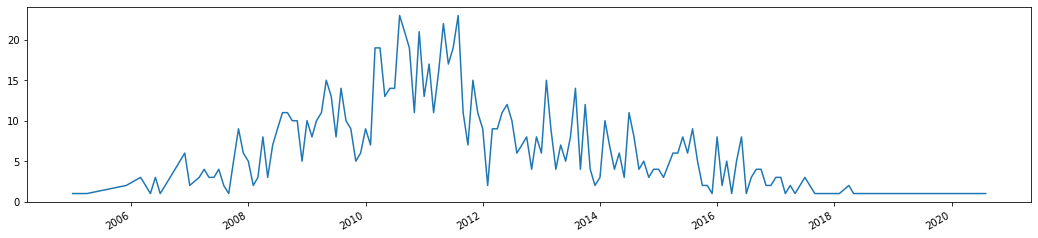

In [0]:
import matplotlib.pyplot as plt
# Plot count vs yearmonth, to see the distribution
plt.figure(figsize=(18,4))
yrmo = pd.to_datetime(df['yelp_since_YRMO'], format='%Y%m')
yrmo = pd.DataFrame(yrmo)
yrmo.yelp_since_YRMO.value_counts().plot(kind='line')

Out[24]: <AxesSubplot:>

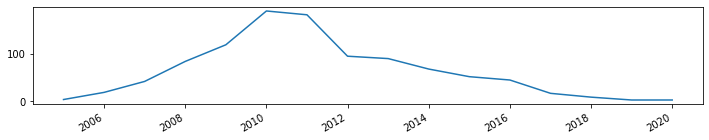

In [0]:
plt.figure(figsize=(12,2))
year = pd.to_datetime(df['yelp_since_year'], format='%Y')
year = pd.DataFrame(year)
year.yelp_since_year.value_counts().plot(kind='line')

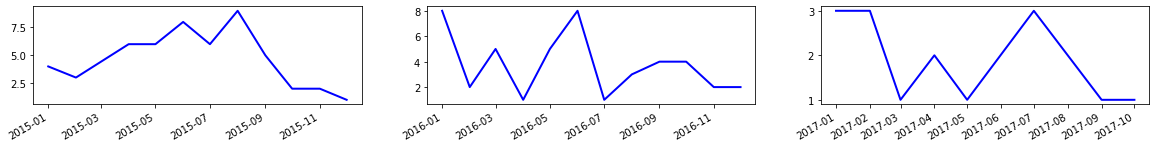

In [0]:
# Time Period 201501-201512 | 201601-201612 | 201701-201712
plt.figure(figsize=(20,2))
period_15 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201501, format='%Y%m')]
period_15 = period_15[period_15.yelp_since_YRMO <= pd.to_datetime(201512, format='%Y%m')]
period_15 = pd.to_datetime(period_15.yelp_since_YRMO, format='%Y%m')

period_16 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201601, format='%Y%m')]
period_16 = period_16[period_16.yelp_since_YRMO <= pd.to_datetime(201612, format='%Y%m')]
period_16 = pd.to_datetime(period_16.yelp_since_YRMO, format='%Y%m')

period_17 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201701, format='%Y%m')]
period_17 = period_17[period_17.yelp_since_YRMO <= pd.to_datetime(201712, format='%Y%m')]
period_17 = pd.to_datetime(period_17.yelp_since_YRMO, format='%Y%m')

plt.subplot(131)
period_15.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(132)
period_16.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(133)
period_17.value_counts().plot(kind='line', linewidth=2, color='b')
plt.show()


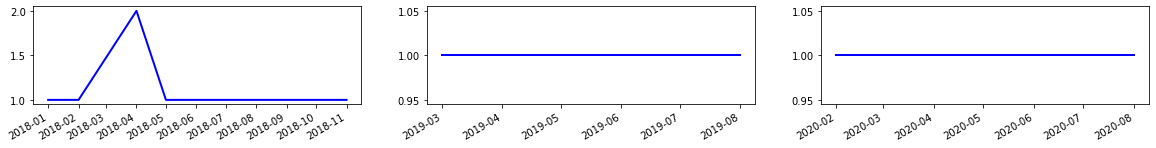

In [0]:
# Time Period 201201-201212 | 201301-201312 | 201401-201412
plt.figure(figsize=(20,2))
period_12 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201801, format='%Y%m')]
period_12 = period_12[period_12.yelp_since_YRMO <= pd.to_datetime(201812, format='%Y%m')]
period_12 = pd.to_datetime(period_12.yelp_since_YRMO, format='%Y%m')

period_13 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201901, format='%Y%m')]
period_13 = period_13[period_13.yelp_since_YRMO <= pd.to_datetime(201912, format='%Y%m')]
period_13 = pd.to_datetime(period_13.yelp_since_YRMO, format='%Y%m')

period_14 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(202001, format='%Y%m')]
period_14 = period_14[period_14.yelp_since_YRMO <= pd.to_datetime(202012, format='%Y%m')]
period_14 = pd.to_datetime(period_14.yelp_since_YRMO, format='%Y%m')

plt.subplot(131)
period_12.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(132)
period_13.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(133)
period_14.value_counts().plot(kind='line', linewidth=2, color='b')
plt.show()

### 2. Customer Rating Analysis

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Customer Rating Analysis</h2></a>

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[27]: <AxesSubplot:xlabel='average_stars', ylabel='Density'>

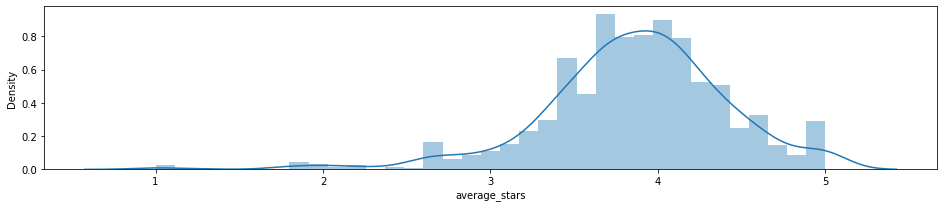

In [0]:
import seaborn as sns
plt.figure(figsize=(16,3))
sns.distplot(df.average_stars)

In [0]:
raters_below_3 = len(df.loc[df.average_stars <= 3])
print("Users who rate <= 3 Avg Stars: {:0.02%}".format(raters_below_3/df.shape[0]))

Users who rate <= 3 Avg Stars: 6.56%


In [0]:
low_raters = len(df.loc[df.average_stars < 4])
high_raters = len(df.loc[df.average_stars >= 4])
print("Low Raters, <4 Avg Stars: {:0.02%}".format(low_raters/df.shape[0]))
print("High Raters >=4 Avg Stars: {:0.02%}".format(high_raters/df.shape[0]))

Low Raters, <4 Avg Stars: 57.73%
High Raters >=4 Avg Stars: 42.27%


In [0]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [0]:
df

average_stars 
 compliment_cool 
 compliment_cute 
 compliment_funny 
 compliment_hot 
 compliment_list 
 compliment_more 
 compliment_note 
 compliment_photos 
 compliment_plain 
 ... 
 yelp_since_YRMO 
 yelp_since_year 
 tagged_compliment 
 friend_count 
 business_id 
 business_name 
 text_basic_cleaned 
 categories 
 state 
 date 
 
 
 
 
 0 
 3.63 
 10 
 0 
 10 
 6 
 0 
 3 
 4 
 1 
 4 
 ... 
 201012 
 2010 
 1 
 35 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 holy diabetic shocknever fails 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2012-05-18T05:46:51.000Z 
 
 
 1 
 4.12 
 4 
 0 
 4 
 1 
 2 
 2 
 6 
 6 
 12 
 ... 
 200811 
 2008 
 1 
 91 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 the portland cream donut which is like a bosto... 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2017-03-24T05:41:33.000Z 
 
 
 2 
 3.92 
 49 
 10 
 49 
 31 
 1 
 6 
 21 
 11 
 42 
 ... 
 200805 
 2008 
 1 
 478 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 line are way too long 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2012-10-06T22:08:45.000Z 
 
 
 3 
 4.52 
 14 
 0 
 14 
 7 
 0 
 0 
 1 
 2 
 17 
 ... 
 201305 
 2013 
 1 
 150 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 no matter how long the line is go for it it mo... 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2013-05-26T22:49:09.000Z 
 
 
 4 
 3.98 
 17 
 0 
 17 
 6 
 0 
 0 
 6 
 8 
 15 
 ... 
 201005 
 2010 
 1 
 262 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 long line good donut 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2011-07-29T03:31:07.000Z 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1017 
 3.50 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 201012 
 2010 
 1 
 307 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 go late on a sunday night to avoid the long lines 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2011-09-26T06:27:42.000Z 
 
 
 1018 
 3.78 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 ... 
 201102 
 2011 
 1 
 22 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 long line 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2011-07-01T20:14:02.000Z 
 
 
 1019 
 3.32 
 19 
 4 
 19 
 65 
 0 
 7 
 54 
 4 
 32 
 ... 
 200912 
 2009 
 1 
 375 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 is there still a line 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2015-11-28T18:58:29.000Z 
 
 
 1020 
 2.00 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 201707 
 2017 
 0 
 121 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 love voodoo 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2019-04-07T20:45:09.000Z 
 
 
 1021 
 4.57 
 3 
 4 
 3 
 6 
 0 
 0 
 7 
 18 
 7 
 ... 
 201104 
 2011 
 1 
 85 
 4CxF8c3MB7VAdY8zFb2cZQ 
 Voodoo Doughnut - Old Town 
 overrated 
 Local Flavor, Food, Donuts, Wedding Chapels, E... 
 OR 
 2020-07-23T04:02:10.000Z 
 
 
 
 1022 rows × 30 columns

In [0]:
raters = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    if df.loc[i,"average_stars"] >= 4:
        raters[i] = 1
#     elif float(3) <= df.loc[i,"average_stars"] < float(4):
#         rating[i] = "M"
#     else:
#         raters[i] = "H"
# Add column to main df
df['raters'] = raters

### 3. Customer Engagement Analysis

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Customer Engagement Analysis</h2></a>

In [0]:
reviews_DF = (spark.read.option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/reviews_EDAcleaned.json"))
reviews_pdf=reviews_DF.toPandas()

In [0]:
reviews_pdf=reviews_pdf[reviews_pdf['business_id'].isin(['4CxF8c3MB7VAdY8zFb2cZQ'])]



In [0]:
reviews_pdf.columns

Out[3]: Index(['Date', 'Timestamp', 'business_id', 'cool', 'funny', 'month', 'text',
       'text_basic_cleaned', 'text_lemmatized', 'text_w/o_stopwords', 'useful',
       'user_stars'],
      dtype='object')

In [0]:
reviews_pdf['review_id']=reviews_pdf.index

In [0]:
#count_review = rvw_df[['date', 'review_id']].groupby(['date']).count().rename(columns={'review_id':'count'})
count_review = reviews_pdf[['Date', 'review_id']].groupby(['Date']).count().rename(columns={'review_id':'count'}).resample('1d').sum().fillna(0)
count_review['rolling_mean_30d'] = count_review.rolling(window=30, min_periods=1).mean()
count_review = count_review.reset_index()

fig, ax = plt.subplots(figsize=(12,7.5))

_ = count_review.plot(
    ax=ax,
    x='Date', 
    y='rolling_mean_30d',
    style='--'
)

_ = count_review.plot(
    ax=ax,
    x='Date', 
    y='count',
    alpha=.3
)

_ = ax.set_title('Daily Number of New Review')
_ = ax.legend(['Rolling Mean 30 Days', 'Daily Count'])
_ = ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<command-4022088410810074> in <module>
      1 #count_review = rvw_df[['date', 'review_id']].groupby(['date']).count().rename(columns={'review_id':'count'})
----> 2 count_review = reviews_pdf[['Date', 'review_id']].groupby(['Date']).count().rename(columns={'review_id':'count'}).resample('1d').sum().fillna(0)
      3 count_review['rolling_mean_30d'] = count_review.rolling(window=30, min_periods=1).mean()
      4 count_review = count_review.reset_index()
      5 

/databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in resample(self, rule, axis, closed, label, convention, kind, loffset, base, on, level, origin, offset)
   8367 
   8368         axis = self._get_axis_number(axis)
-> 8369         return get_resampler(
   8370             self,
   8371             freq=rule,

/databricks/python/lib/python3.8/site-packages/pan

In [0]:
def growth(df, date_col='date', count_col='count', resample_period='AS'):
    df_ri = df.set_index(date_col)
    df_resample = df_ri[count_col].resample(resample_period).sum().to_frame().reset_index()

    df_resample['prev'] = df_resample[date_col] - pd.DateOffset(years=1)

    growth_df = df_resample.merge(
        df_resample,
        how='inner',
        left_on=[date_col],
        right_on=['prev'],
        suffixes=['_l', '_r']
    ).loc[:,['{}_r'.format(date_col), '{}_l'.format(count_col), '{}_r'.format(count_col)]].rename(
        columns={
            '{}_r'.format(date_col) : 'date',
            '{}_l'.format(count_col) : 'count_last_year',
            '{}_r'.format(count_col) : 'count_current'
        }
    )
    
    growth_df['growth'] = growth_df['count_current'] / growth_df['count_last_year']
    return growth_df

In [0]:
yoy_review = growth(count_review)

fig, ax = plt.subplots(figsize=(12,7.5))

_ = yoy_review[yoy_review['date'] >= '2008-01-01'].plot(
    ax=ax,
    x='date', 
    y='growth',
    linewidth=3
)

_ = yoy_user_df[yoy_user_df['date'] >= '2008-01-01'].plot(
    ax=ax,
    x='date', 
    y='growth',
    style='--',
    linewidth=3
)

_ = ax.set_title('Yearly User and Review Growth Comparison')
_ = ax.legend(['#Review Growth', '#User Growth'])
_ = ax.set_yticklabels(['{:,.0f}%'.format(x*100) for x in ax.get_yticks()])

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2404704470034521> in <module>
----> 1 yoy_review = growth(count_review)
      2 
      3 fig, ax = plt.subplots(figsize=(12,7.5))
      4 
      5 _ = yoy_review[yoy_review['date'] >= '2008-01-01'].plot(

NameError: name 'count_review' is not defined

### 4. Correlation Analysis

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Correlation Analysis</h2></a>

#### Scaling Feature values

In [0]:
from sklearn.preprocessing import StandardScaler

# Don't scale columns: yelp_since_year, yelp_since_YRMO, elite
features = ['review_count', 'useful', 'funny', 'cool', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'friend_count', 'elite_count', 'raters', 'tagged_compliment']
x = df.loc[:, features]
x = StandardScaler().fit_transform(x)

In [0]:
# Adding column names back to data, and converting ndarray back to datafram obj
df_scaled= pd.DataFrame(x, columns=features)
df_scaled.head()

review_count 
 useful 
 funny 
 cool 
 fans 
 average_stars 
 compliment_hot 
 compliment_more 
 compliment_profile 
 compliment_cute 
 ... 
 compliment_note 
 compliment_plain 
 compliment_cool 
 compliment_funny 
 compliment_writer 
 compliment_photos 
 friend_count 
 elite_count 
 raters 
 tagged_compliment 
 
 
 
 
 0 
 -0.031355 
 -0.182038 
 -0.182573 
 -0.195183 
 -0.098676 
 -0.404102 
 -0.195334 
 -0.152402 
 -0.146950 
 -0.190114 
 ... 
 -0.219059 
 -0.203045 
 -0.204225 
 -0.204225 
 -0.196193 
 -0.159622 
 -0.332698 
 0.520501 
 -0.855689 
 0.465475 
 
 
 1 
 1.079732 
 -0.052953 
 -0.161085 
 -0.110555 
 -0.014764 
 0.465430 
 -0.208600 
 -0.181646 
 -0.171897 
 -0.190114 
 ... 
 -0.206921 
 -0.185191 
 -0.216417 
 -0.216417 
 -0.176974 
 -0.147856 
 -0.255756 
 1.219977 
 1.168649 
 0.465475 
 
 
 2 
 0.655419 
 -0.049193 
 -0.079432 
 -0.118380 
 0.038634 
 0.110519 
 -0.129007 
 -0.064669 
 -0.122002 
 0.182601 
 ... 
 -0.115884 
 -0.118241 
 -0.124977 
 -0.124977 
 -0.100099 
 -0.136091 
 0.275965 
 0.520501 
 -0.855689 
 0.465475 
 
 
 3 
 -0.337560 
 -0.234925 
 -0.217735 
 -0.217499 
 -0.091047 
 1.175252 
 -0.192681 
 -0.240134 
 -0.171897 
 -0.190114 
 ... 
 -0.237267 
 -0.174033 
 -0.196097 
 -0.196097 
 -0.221818 
 -0.157269 
 -0.174693 
 -0.528714 
 1.168649 
 0.465475 
 
 
 4 
 0.263915 
 -0.155970 
 -0.186480 
 -0.180402 
 -0.057991 
 0.216992 
 -0.195334 
 -0.240134 
 -0.122002 
 -0.190114 
 ... 
 -0.206921 
 -0.178496 
 -0.190001 
 -0.190001 
 -0.202599 
 -0.143150 
 -0.020810 
 0.170763 
 -0.855689 
 0.465475 
 
 
 
 5 rows × 21 columns

In [0]:
df_scaled.describe()

review_count 
 useful 
 funny 
 cool 
 fans 
 average_stars 
 compliment_hot 
 compliment_more 
 compliment_profile 
 compliment_cute 
 ... 
 compliment_note 
 compliment_plain 
 compliment_cool 
 compliment_funny 
 compliment_writer 
 compliment_photos 
 friend_count 
 elite_count 
 raters 
 tagged_compliment 
 
 
 
 
 count 
 1022.000000 
 1022.000000 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 ... 
 1.022000e+03 
 1.022000e+03 
 1022.000000 
 1022.000000 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 1.022000e+03 
 
 
 mean 
 0.000000 
 0.000000 
 1.390495e-17 
 -1.390495e-17 
 6.952473e-18 
 -5.144830e-16 
 -6.952473e-18 
 2.780989e-17 
 1.390495e-17 
 -1.390495e-17 
 ... 
 1.390495e-17 
 1.390495e-17 
 0.000000 
 0.000000 
 -2.780989e-17 
 1.390495e-17 
 4.171484e-17 
 -2.780989e-17 
 1.042871e-16 
 1.668594e-16 
 
 
 std 
 1.000490 
 1.000490 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 ... 
 1.000490e+00 
 1.000490e+00 
 1.000490 
 1.000490 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 1.000490e+00 
 
 
 min 
 -0.444731 
 -0.244450 
 -2.185160e-01 
 -2.198177e-01 
 -1.063041e-01 
 -5.071182e+00 
 -2.112529e-01 
 -2.401343e-01 
 -1.718968e-01 
 -1.901137e-01 
 ... 
 -2.433360e-01 
 -2.119712e-01 
 -0.224545 
 -0.224545 
 -2.218182e-01 
 -1.619746e-01 
 -3.794122e-01 
 -5.287136e-01 
 -8.556888e-01 
 -2.148345e+00 
 
 
 25% 
 -0.405362 
 -0.241191 
 -2.173440e-01 
 -2.189482e-01 
 -1.063041e-01 
 -4.750841e-01 
 -2.112529e-01 
 -2.401343e-01 
 -1.718968e-01 
 -1.901137e-01 
 ... 
 -2.433360e-01 
 -2.119712e-01 
 -0.224545 
 -0.224545 
 -2.218182e-01 
 -1.619746e-01 
 -3.574289e-01 
 -5.287136e-01 
 -8.556888e-01 
 4.654747e-01 
 
 
 50% 
 -0.322249 
 -0.229411 
 -2.118744e-01 
 -2.140213e-01 
 -1.012185e-01 
 5.728236e-02 
 -2.085998e-01 
 -2.401343e-01 
 -1.718968e-01 
 -1.901137e-01 
 ... 
 -2.311978e-01 
 -2.075078e-01 
 -0.222513 
 -0.222513 
 -2.154119e-01 
 -1.619746e-01 
 -2.756785e-01 
 -5.287136e-01 
 -8.556888e-01 
 4.654747e-01 
 
 
 75% 
 -0.042290 
 -0.161798 
 -1.726104e-01 
 -1.801123e-01 
 -7.070517e-02 
 5.719033e-01 
 -1.953343e-01 
 -1.524017e-01 
 -1.469496e-01 
 -1.528423e-01 
 ... 
 -1.826446e-01 
 -1.851912e-01 
 -0.196097 
 -0.196097 
 -1.833806e-01 
 -1.549156e-01 
 -5.241065e-02 
 1.707625e-01 
 1.168649e+00 
 4.654747e-01 
 
 
 max 
 14.113127 
 16.712068 
 1.931381e+01 
 1.656718e+01 
 3.070200e+01 
 2.027038e+00 
 8.992314e+00 
 1.487911e+01 
 1.908738e+01 
 1.210948e+01 
 ... 
 9.576547e+00 
 1.281427e+01 
 9.888772 
 9.888772 
 1.588992e+01 
 1.406445e+01 
 1.046385e+01 
 4.717357e+00 
 1.168649e+00 
 4.654747e-01 
 
 
 
 8 rows × 21 columns

In [0]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
DF=spark.createDataFrame(df_scaled) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/User_Dashboard/user_df_scaled.json")

#### Correlation Matrix

In [0]:
# Covariance matrix of scaled data
cov = df_scaled.cov()
cov.style.background_gradient(cmap='coolwarm').set_precision(2)

review_count useful funny cool fans average_stars compliment_hot compliment_more compliment_profile compliment_cute compliment_list compliment_note compliment_plain compliment_cool compliment_funny compliment_writer compliment_photos friend_count elite_count raters tagged_compliment 
 
 review_count 
 1.00 
 0.75 
 0.70 
 0.70 
 0.31 
 -0.02 
 0.47 
 0.58 
 0.35 
 0.38 
 0.46 
 0.58 
 0.50 
 0.52 
 0.52 
 0.59 
 0.46 
 0.50 
 0.64 
 -0.10 
 0.19 
 
 
 useful 
 0.75 
 1.00 
 0.99 
 1.00 
 0.41 
 0.02 
 0.70 
 0.71 
 0.45 
 0.45 
 0.52 
 0.75 
 0.61 
 0.76 
 0.76 
 0.79 
 0.80 
 0.66 
 0.43 
 -0.00 
 0.11 
 
 
 funny 
 0.70 
 0.99 
 1.00 
 0.99 
 0.37 
 0.02 
 0.73 
 0.74 
 0.50 
 0.48 
 0.58 
 0.74 
 0.59 
 0.76 
 0.76 
 0.83 
 0.80 
 0.63 
 0.38 
 0.00 
 0.10 
 
 
 cool 
 0.70 
 1.00 
 0.99 
 1.00 
 0.37 
 0.02 
 0.72 
 0.71 
 0.46 
 0.45 
 0.52 
 0.75 
 0.61 
 0.78 
 0.78 
 0.79 
 0.82 
 0.65 
 0.39 
 0.01 
 0.10 
 
 
 fans 
 0.31 
 0.41 
 0.37 
 0.37 
 1.00 
 0.03 
 0.21 
 0.27 
 0.15 
 0.27 
 0.20 
 0.27 
 0.19 
 0.24 
 0.24 
 0.30 
 0.30 
 0.40 
 0.21 
 0.03 
 0.05 
 
 
 average_stars 
 -0.02 
 0.02 
 0.02 
 0.02 
 0.03 
 1.00 
 0.03 
 0.02 
 0.03 
 0.02 
 0.02 
 0.02 
 0.02 
 0.03 
 0.03 
 0.02 
 0.04 
 0.06 
 0.02 
 0.72 
 -0.10 
 
 
 compliment_hot 
 0.47 
 0.70 
 0.73 
 0.72 
 0.21 
 0.03 
 1.00 
 0.87 
 0.79 
 0.80 
 0.73 
 0.92 
 0.88 
 0.96 
 0.96 
 0.88 
 0.80 
 0.50 
 0.35 
 0.04 
 0.10 
 
 
 compliment_more 
 0.58 
 0.71 
 0.74 
 0.71 
 0.27 
 0.02 
 0.87 
 1.00 
 0.90 
 0.78 
 0.86 
 0.88 
 0.81 
 0.85 
 0.85 
 0.92 
 0.79 
 0.54 
 0.39 
 0.01 
 0.11 
 
 
 compliment_profile 
 0.35 
 0.45 
 0.50 
 0.46 
 0.15 
 0.03 
 0.79 
 0.90 
 1.00 
 0.81 
 0.87 
 0.73 
 0.73 
 0.72 
 0.72 
 0.83 
 0.65 
 0.39 
 0.30 
 0.03 
 0.08 
 
 
 compliment_cute 
 0.38 
 0.45 
 0.48 
 0.45 
 0.27 
 0.02 
 0.80 
 0.78 
 0.81 
 1.00 
 0.82 
 0.71 
 0.68 
 0.68 
 0.68 
 0.75 
 0.51 
 0.45 
 0.31 
 0.01 
 0.09 
 
 
 compliment_list 
 0.46 
 0.52 
 0.58 
 0.52 
 0.20 
 0.02 
 0.73 
 0.86 
 0.87 
 0.82 
 1.00 
 0.69 
 0.70 
 0.65 
 0.65 
 0.84 
 0.58 
 0.42 
 0.31 
 0.04 
 0.08 
 
 
 compliment_note 
 0.58 
 0.75 
 0.74 
 0.75 
 0.27 
 0.02 
 0.92 
 0.88 
 0.73 
 0.71 
 0.69 
 1.00 
 0.92 
 0.95 
 0.95 
 0.81 
 0.80 
 0.60 
 0.38 
 0.02 
 0.11 
 
 
 compliment_plain 
 0.50 
 0.61 
 0.59 
 0.61 
 0.19 
 0.02 
 0.88 
 0.81 
 0.73 
 0.68 
 0.70 
 0.92 
 1.00 
 0.91 
 0.91 
 0.76 
 0.71 
 0.52 
 0.34 
 0.04 
 0.10 
 
 
 compliment_cool 
 0.52 
 0.76 
 0.76 
 0.78 
 0.24 
 0.03 
 0.96 
 0.85 
 0.72 
 0.68 
 0.65 
 0.95 
 0.91 
 1.00 
 1.00 
 0.85 
 0.84 
 0.56 
 0.37 
 0.04 
 0.10 
 
 
 compliment_funny 
 0.52 
 0.76 
 0.76 
 0.78 
 0.24 
 0.03 
 0.96 
 0.85 
 0.72 
 0.68 
 0.65 
 0.95 
 0.91 
 1.00 
 1.00 
 0.85 
 0.84 
 0.56 
 0.37 
 0.04 
 0.10 
 
 
 compliment_writer 
 0.59 
 0.79 
 0.83 
 0.79 
 0.30 
 0.02 
 0.88 
 0.92 
 0.83 
 0.75 
 0.84 
 0.81 
 0.76 
 0.85 
 0.85 
 1.00 
 0.80 
 0.53 
 0.43 
 0.02 
 0.10 
 
 
 compliment_photos 
 0.46 
 0.80 
 0.80 
 0.82 
 0.30 
 0.04 
 0.80 
 0.79 
 0.65 
 0.51 
 0.58 
 0.80 
 0.71 
 0.84 
 0.84 
 0.80 
 1.00 
 0.50 
 0.26 
 0.07 
 0.08 
 
 
 friend_count 
 0.50 
 0.66 
 0.63 
 0.65 
 0.40 
 0.06 
 0.50 
 0.54 
 0.39 
 0.45 
 0.42 
 0.60 
 0.52 
 0.56 
 0.56 
 0.53 
 0.50 
 1.00 
 0.38 
 0.06 
 0.15 
 
 
 elite_count 
 0.64 
 0.43 
 0.38 
 0.39 
 0.21 
 0.02 
 0.35 
 0.39 
 0.30 
 0.31 
 0.31 
 0.38 
 0.34 
 0.37 
 0.37 
 0.43 
 0.26 
 0.38 
 1.00 
 -0.05 
 0.25 
 
 
 raters 
 -0.10 
 -0.00 
 0.00 
 0.01 
 0.03 
 0.72 
 0.04 
 0.01 
 0.03 
 0.01 
 0.04 
 0.02 
 0.04 
 0.04 
 0.04 
 0.02 
 0.07 
 0.06 
 -0.05 
 1.00 
 -0.15 
 
 
 tagged_compliment 
 0.19 
 0.11 
 0.10 
 0.10 
 0.05 
 -0.10 
 0.10 
 0.11 
 0.08 
 0.09 
 0.08 
 0.11 
 0.10 
 0.10 
 0.10 
 0.10 
 0.08 
 0.15 
 0.25 
 -0.15 
 1.00

In [0]:
# Correlation matrix of unscaled original data which includes, elite count, yrmo features etc
# Idea is to see which features are correlated and can be combined (PCA) together to build a hypothesis/cluster


corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

average_stars compliment_cool compliment_cute compliment_funny compliment_hot compliment_list compliment_more compliment_note compliment_photos compliment_plain compliment_profile compliment_writer cool fans funny review_count useful elite_count yelp_since_YRMO yelp_since_year tagged_compliment friend_count raters 
 
 average_stars 
 1.00 
 0.03 
 0.02 
 0.03 
 0.03 
 0.02 
 0.02 
 0.02 
 0.04 
 0.02 
 0.03 
 0.02 
 0.02 
 0.03 
 0.02 
 -0.02 
 0.02 
 0.02 
 0.04 
 0.04 
 -0.10 
 0.06 
 0.72 
 
 
 compliment_cool 
 0.03 
 1.00 
 0.68 
 1.00 
 0.96 
 0.65 
 0.85 
 0.95 
 0.84 
 0.91 
 0.72 
 0.84 
 0.78 
 0.24 
 0.76 
 0.52 
 0.76 
 0.37 
 -0.10 
 -0.10 
 0.10 
 0.56 
 0.04 
 
 
 compliment_cute 
 0.02 
 0.68 
 1.00 
 0.68 
 0.80 
 0.81 
 0.78 
 0.71 
 0.51 
 0.68 
 0.81 
 0.75 
 0.45 
 0.27 
 0.48 
 0.38 
 0.45 
 0.31 
 -0.17 
 -0.17 
 0.09 
 0.45 
 0.01 
 
 
 compliment_funny 
 0.03 
 1.00 
 0.68 
 1.00 
 0.96 
 0.65 
 0.85 
 0.95 
 0.84 
 0.91 
 0.72 
 0.84 
 0.78 
 0.24 
 0.76 
 0.52 
 0.76 
 0.37 
 -0.10 
 -0.10 
 0.10 
 0.56 
 0.04 
 
 
 compliment_hot 
 0.03 
 0.96 
 0.80 
 0.96 
 1.00 
 0.73 
 0.87 
 0.92 
 0.80 
 0.88 
 0.79 
 0.88 
 0.72 
 0.21 
 0.72 
 0.47 
 0.70 
 0.35 
 -0.12 
 -0.12 
 0.10 
 0.50 
 0.04 
 
 
 compliment_list 
 0.02 
 0.65 
 0.81 
 0.65 
 0.73 
 1.00 
 0.86 
 0.69 
 0.57 
 0.70 
 0.87 
 0.84 
 0.51 
 0.20 
 0.58 
 0.46 
 0.52 
 0.31 
 -0.13 
 -0.13 
 0.08 
 0.42 
 0.04 
 
 
 compliment_more 
 0.02 
 0.85 
 0.78 
 0.85 
 0.87 
 0.86 
 1.00 
 0.88 
 0.79 
 0.81 
 0.90 
 0.92 
 0.71 
 0.27 
 0.74 
 0.58 
 0.71 
 0.39 
 -0.15 
 -0.15 
 0.11 
 0.54 
 0.01 
 
 
 compliment_note 
 0.02 
 0.95 
 0.71 
 0.95 
 0.92 
 0.69 
 0.88 
 1.00 
 0.80 
 0.92 
 0.73 
 0.81 
 0.75 
 0.27 
 0.74 
 0.58 
 0.75 
 0.38 
 -0.12 
 -0.12 
 0.11 
 0.60 
 0.02 
 
 
 compliment_photos 
 0.04 
 0.84 
 0.51 
 0.84 
 0.80 
 0.57 
 0.79 
 0.80 
 1.00 
 0.71 
 0.65 
 0.80 
 0.82 
 0.30 
 0.79 
 0.46 
 0.80 
 0.26 
 -0.04 
 -0.04 
 0.08 
 0.50 
 0.07 
 
 
 compliment_plain 
 0.02 
 0.91 
 0.68 
 0.91 
 0.88 
 0.70 
 0.81 
 0.92 
 0.71 
 1.00 
 0.73 
 0.76 
 0.61 
 0.19 
 0.59 
 0.50 
 0.61 
 0.34 
 -0.09 
 -0.09 
 0.10 
 0.52 
 0.04 
 
 
 compliment_profile 
 0.03 
 0.72 
 0.81 
 0.72 
 0.79 
 0.87 
 0.90 
 0.73 
 0.65 
 0.73 
 1.00 
 0.83 
 0.46 
 0.15 
 0.50 
 0.35 
 0.45 
 0.30 
 -0.10 
 -0.10 
 0.08 
 0.39 
 0.03 
 
 
 compliment_writer 
 0.02 
 0.84 
 0.75 
 0.84 
 0.88 
 0.84 
 0.92 
 0.81 
 0.80 
 0.76 
 0.83 
 1.00 
 0.79 
 0.30 
 0.83 
 0.59 
 0.79 
 0.43 
 -0.13 
 -0.13 
 0.10 
 0.53 
 0.02 
 
 
 cool 
 0.02 
 0.78 
 0.45 
 0.78 
 0.72 
 0.51 
 0.71 
 0.75 
 0.82 
 0.61 
 0.46 
 0.79 
 1.00 
 0.37 
 0.99 
 0.70 
 1.00 
 0.39 
 -0.08 
 -0.08 
 0.10 
 0.65 
 0.01 
 
 
 fans 
 0.03 
 0.24 
 0.27 
 0.24 
 0.21 
 0.20 
 0.27 
 0.27 
 0.30 
 0.19 
 0.15 
 0.30 
 0.37 
 1.00 
 0.37 
 0.31 
 0.41 
 0.21 
 -0.06 
 -0.06 
 0.05 
 0.40 
 0.03 
 
 
 funny 
 0.02 
 0.76 
 0.48 
 0.76 
 0.72 
 0.58 
 0.74 
 0.74 
 0.79 
 0.59 
 0.50 
 0.83 
 0.99 
 0.37 
 1.00 
 0.70 
 0.98 
 0.38 
 -0.10 
 -0.10 
 0.10 
 0.62 
 0.00 
 
 
 review_count 
 -0.02 
 0.52 
 0.38 
 0.52 
 0.47 
 0.46 
 0.58 
 0.58 
 0.46 
 0.50 
 0.35 
 0.59 
 0.70 
 0.31 
 0.70 
 1.00 
 0.75 
 0.64 
 -0.20 
 -0.20 
 0.19 
 0.50 
 -0.10 
 
 
 useful 
 0.02 
 0.76 
 0.45 
 0.76 
 0.70 
 0.52 
 0.71 
 0.75 
 0.80 
 0.61 
 0.45 
 0.79 
 1.00 
 0.41 
 0.98 
 0.75 
 1.00 
 0.43 
 -0.10 
 -0.10 
 0.11 
 0.66 
 -0.00 
 
 
 elite_count 
 0.02 
 0.37 
 0.31 
 0.37 
 0.35 
 0.31 
 0.39 
 0.38 
 0.26 
 0.34 
 0.30 
 0.43 
 0.39 
 0.21 
 0.38 
 0.64 
 0.43 
 1.00 
 -0.25 
 -0.25 
 0.25 
 0.38 
 -0.05 
 
 
 yelp_since_YRMO 
 0.04 
 -0.10 
 -0.17 
 -0.10 
 -0.12 
 -0.13 
 -0.15 
 -0.12 
 -0.04 
 -0.09 
 -0.10 
 -0.13 
 -0.08 
 -0.06 
 -0.10 
 -0.20 
 -0.10 
 -0.25 
 1.00 
 1.00 
 -0.46 
 -0.14 
 0.15 
 
 
 yelp_since_year 
 0.04 
 -0.10 
 -0.17 
 -0.10 
 -0.12 
 -0.13 
 -0.15 
 -0.12 
 -0.04 
 -0.09 
 -0.10 
 -0.13 
 -0.08 
 -0.06 
 -0.10 
 -0.20 
 -0.10 
 -0.25 
 1.00 
 1.00 
 -0.46 
 -0.

### 5. Customer Segmentation Analysis

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Customer Segmentation Analysis</h2></a>

#### 5a. Dimensionality Reduction using PCA

In [0]:
df_scaled.columns

Out[38]: Index(['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'friend_count', 'elite_count',
       'raters', 'tagged_compliment'],
      dtype='object')

##### Forming Principal Component 1

Forming review_feedback: features include useful, funny, and cool

In [0]:
from sklearn.decomposition import PCA
df_review = df_scaled.loc[:, ['funny', 'cool', 'useful']]  # Make df of these 3 features
pca = PCA(n_components=1)
review_feedback = pca.fit_transform(df_review)
review_feedback = pd.DataFrame(data=review_feedback)

In [0]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.57618247 0.57823381 0.5776326 ]]
Ratio of Variance Explained: [0.99268283]


Insights: review_feedback feature, exlains an overwhelming majority of variance ~99%

In [0]:
DF=spark.createDataFrame(df_review) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/User_Dashboard/PCA1_review_df.json")

##### Forming Principal Component 2

Forming compliments_feedback: features include all tagged compliments

In [0]:
df_compliments = df_scaled.loc[:, ['compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos']]
pca = PCA(n_components=1)
compliments_feedback = pca.fit_transform(df_compliments)
compliments_feedback = pd.DataFrame(data=compliments_feedback)

In [0]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.32045076 0.31723942 0.29086895 0.2723989  0.27837193 0.31302178
  0.30182445 0.3148371  0.3148371  0.30934704 0.27812337]]
Ratio of Variance Explained: [0.821934]


In [0]:
DF=spark.createDataFrame(df_compliments) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/User_Dashboard/PCA2_compliments_feedback.json")

##### Forming Principal Component 3

Forming popularity_feedback: features include fans, friend_count

In [0]:
df_popularity = df_scaled.loc[:, ['fans', 'friend_count']]
pca = PCA(n_components=1)
popularity_feedback = pca.fit_transform(df_popularity)
popularity_feedback = pd.DataFrame(data=popularity_feedback)

In [0]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.70710678 0.70710678]]
Ratio of Variance Explained: [0.70188502]


In [0]:
DF=spark.createDataFrame(df_popularity) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/User_Dashboard/PCA3_popularity_feedback.json")

##### Forming Principal Component 4

Forming active_feedback: features include review_count, elite_count

In [0]:
df_active = df_scaled.loc[:, ['review_count', 'elite_count']]
pca4 = PCA(n_components=1)
active_feedback = pca4.fit_transform(df_active)
active_feedback = pd.DataFrame(data=active_feedback)

In [0]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.70710678 0.70710678]]
Ratio of Variance Explained: [0.70188502]


In [0]:
DF=spark.createDataFrame(df_active) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/User_Dashboard/PCA4_active_feedback.json")

#### 5b. Customer Segmentation using K-Means Clustering

#### Segmentation Method 1 - Compliment Level
##### PCA Components involved - Review Feedback(useful, funny, cool) Vs Average stars rating

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


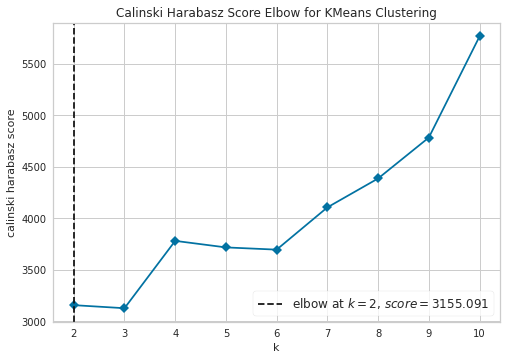

Out[47]: <AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [0]:
from yellowbrick.cluster import KElbowVisualizer
comp_star = pd.concat([compliments_feedback, df.loc[:,'average_stars']], axis=1)
model = KElbowVisualizer(KMeans(), k=10, metric='calinski_harabasz', timings=False)
model.fit(comp_star)
model.show()

In [0]:
# Reset matplotlib parameters, changed by elbow visualizer
mpl.rcParams.update(mpl.rcParamsDefault)

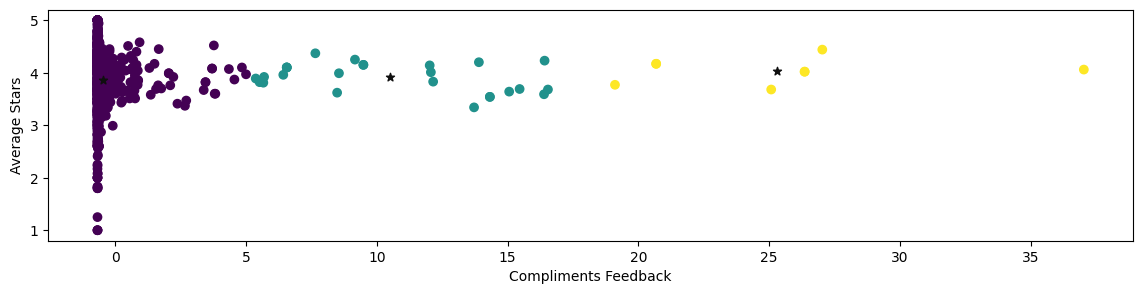

In [0]:
model = KMeans(n_clusters=3)
model.fit(comp_star)
all_predictions = model.predict(comp_star)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(comp_star.iloc[:,0].values, comp_star.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Compliments Feedback')
plt.ylabel('Average Stars')
plt.show()

#### Segmentation Method 2 - Active Level
##### PCA Components involved - Active Feedback (review count, elite status achieved count) vs Avg Stars Ratings

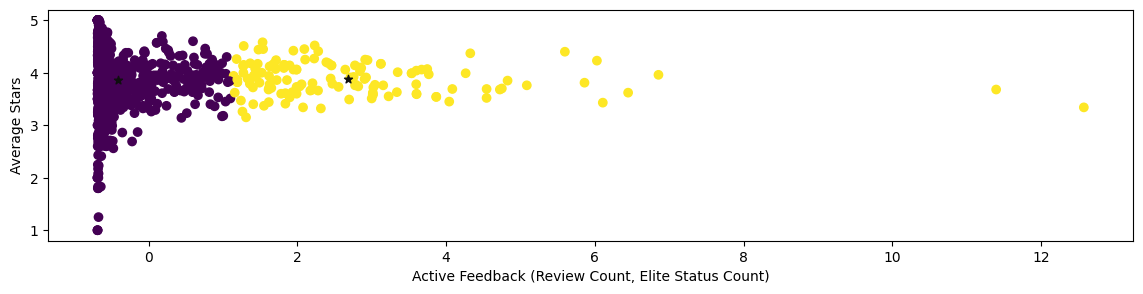

In [0]:
act_star = pd.concat([active_feedback, df.loc[:,'average_stars']], axis=1)
model = KMeans(n_clusters=2)
model.fit(act_star)
all_predictions = model.predict(act_star)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(act_star.iloc[:,0].values, act_star.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Active Feedback (Review Count, Elite Status Count)')
plt.ylabel('Average Stars')
plt.show()

#### Segmentation Method 3 - Popularity Level
##### PCA Components involved - Popularity Feedback (Friend Count, Fans Count) vs Avg Stars Ratings

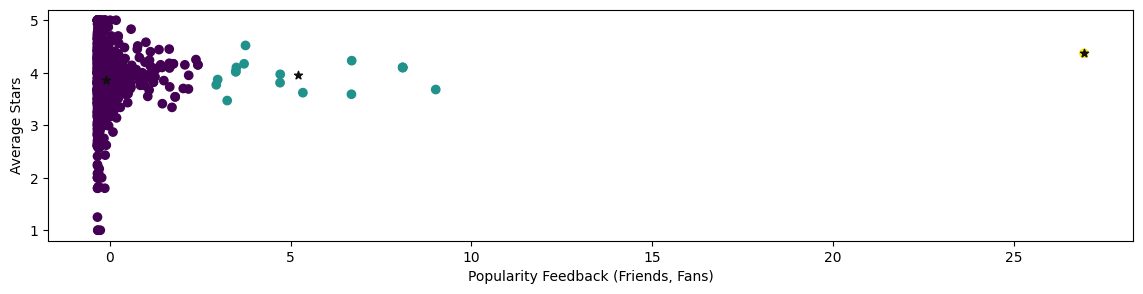

In [0]:
pop_stars = pd.concat([popularity_feedback, df.loc[:,'average_stars']], axis=1)
model = KMeans(n_clusters=3)
model.fit(pop_stars)
all_predictions = model.predict(pop_stars)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(pop_stars.iloc[:,0].values, pop_stars.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Popularity Feedback (Friends, Fans)')
plt.ylabel('Average Stars')
plt.show()

#### Segmentation Method 4 - Targettable Level
##### PCA Components involved -  Review Feedback (funny, cool, useful) vs Popularity Feedback (Fan Count, Friends Count)

In [0]:
rev_pop = pd.concat([review_feedback, popularity_feedback], axis=1)
print("Correlation: {:0.02%}".format((rev_pop.corr()).iloc[0,1]))

Correlation: 61.63%


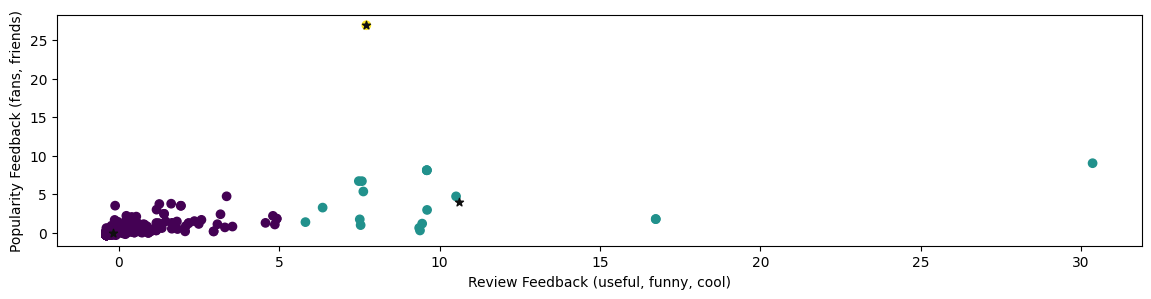

In [0]:
model = KMeans(n_clusters=3)
model.fit(rev_pop)
all_predictions = model.predict(rev_pop)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(rev_pop.iloc[:,0].values, rev_pop.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Review Feedback (useful, funny, cool)')
plt.ylabel('Popularity Feedback (fans, friends)')
plt.show()

#### Segmentation Method 5 - Reviewer's Quality Level
##### PCA Components involved - Review Feedback (funny, cool, useful) vs Active Feedback (Review Count, Elite Status Count)

In [0]:
rev_act = pd.concat([review_feedback, active_feedback], axis=1)
print("Correlation: {:0.02%}".format((rev_act.corr()).iloc[0,1]))

Correlation: 61.84%


Out[55]: Text(0, 0.5, 'Active Feedback (review, elite counts)')

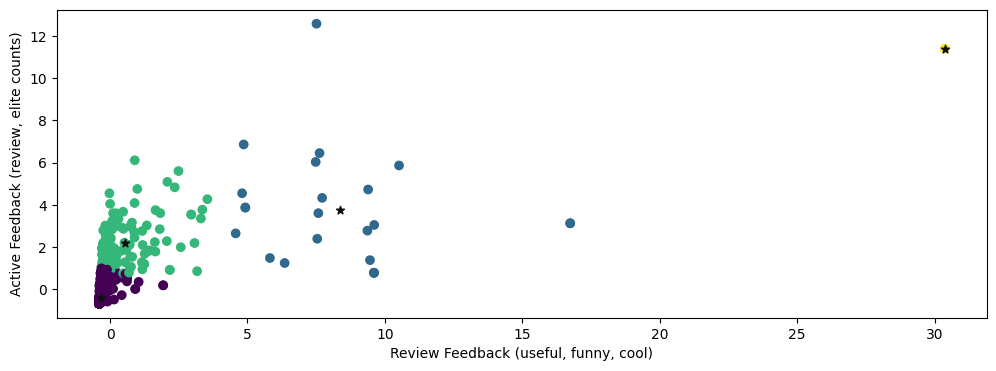

In [0]:
model = KMeans(n_clusters=4)
model.fit(rev_act)
all_predictions = model.predict(rev_act)
centroids = model.cluster_centers_

plt.figure(figsize=(12,4))
plt.scatter(rev_act.iloc[:,0].values, rev_act.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Review Feedback (useful, funny, cool)')
plt.ylabel('Active Feedback (review, elite counts)')

### <a id='4'><h2 style="background-color:lightgreen;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">User Influencer Analysis</h2></a>

In [0]:
df.columns

Out[71]: Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'fans', 'funny', 'name', 'review_count', 'useful', 'user_id',
       'elite_count', 'yelp_since_YRMO', 'yelp_since_year',
       'tagged_compliment', 'friend_count', 'business_id', 'business_name',
       'text_basic_cleaned', 'categories', 'state', 'date', 'raters'],
      dtype='object')

In [0]:


#df['total_friends'] =df['friends'].apply(cal_total_friends)

# Getting the Users(Yelpers) based on review counts
review_total = df.sort_values(by='review_count',ascending=True)

# Getting the Users based on number of fans
fans = df.sort_values(by='fans',ascending=True)

# Getting the Users based on number of total friends on yelp
friends = df.sort_values(by='friend_count',ascending=True)

# Getting the Users based on number of useful reviews 
useful = df.sort_values(by='useful',ascending=True)

# Getting the Users based on number of useful reviews 
elite = df.sort_values(by='elite_count',ascending=True)




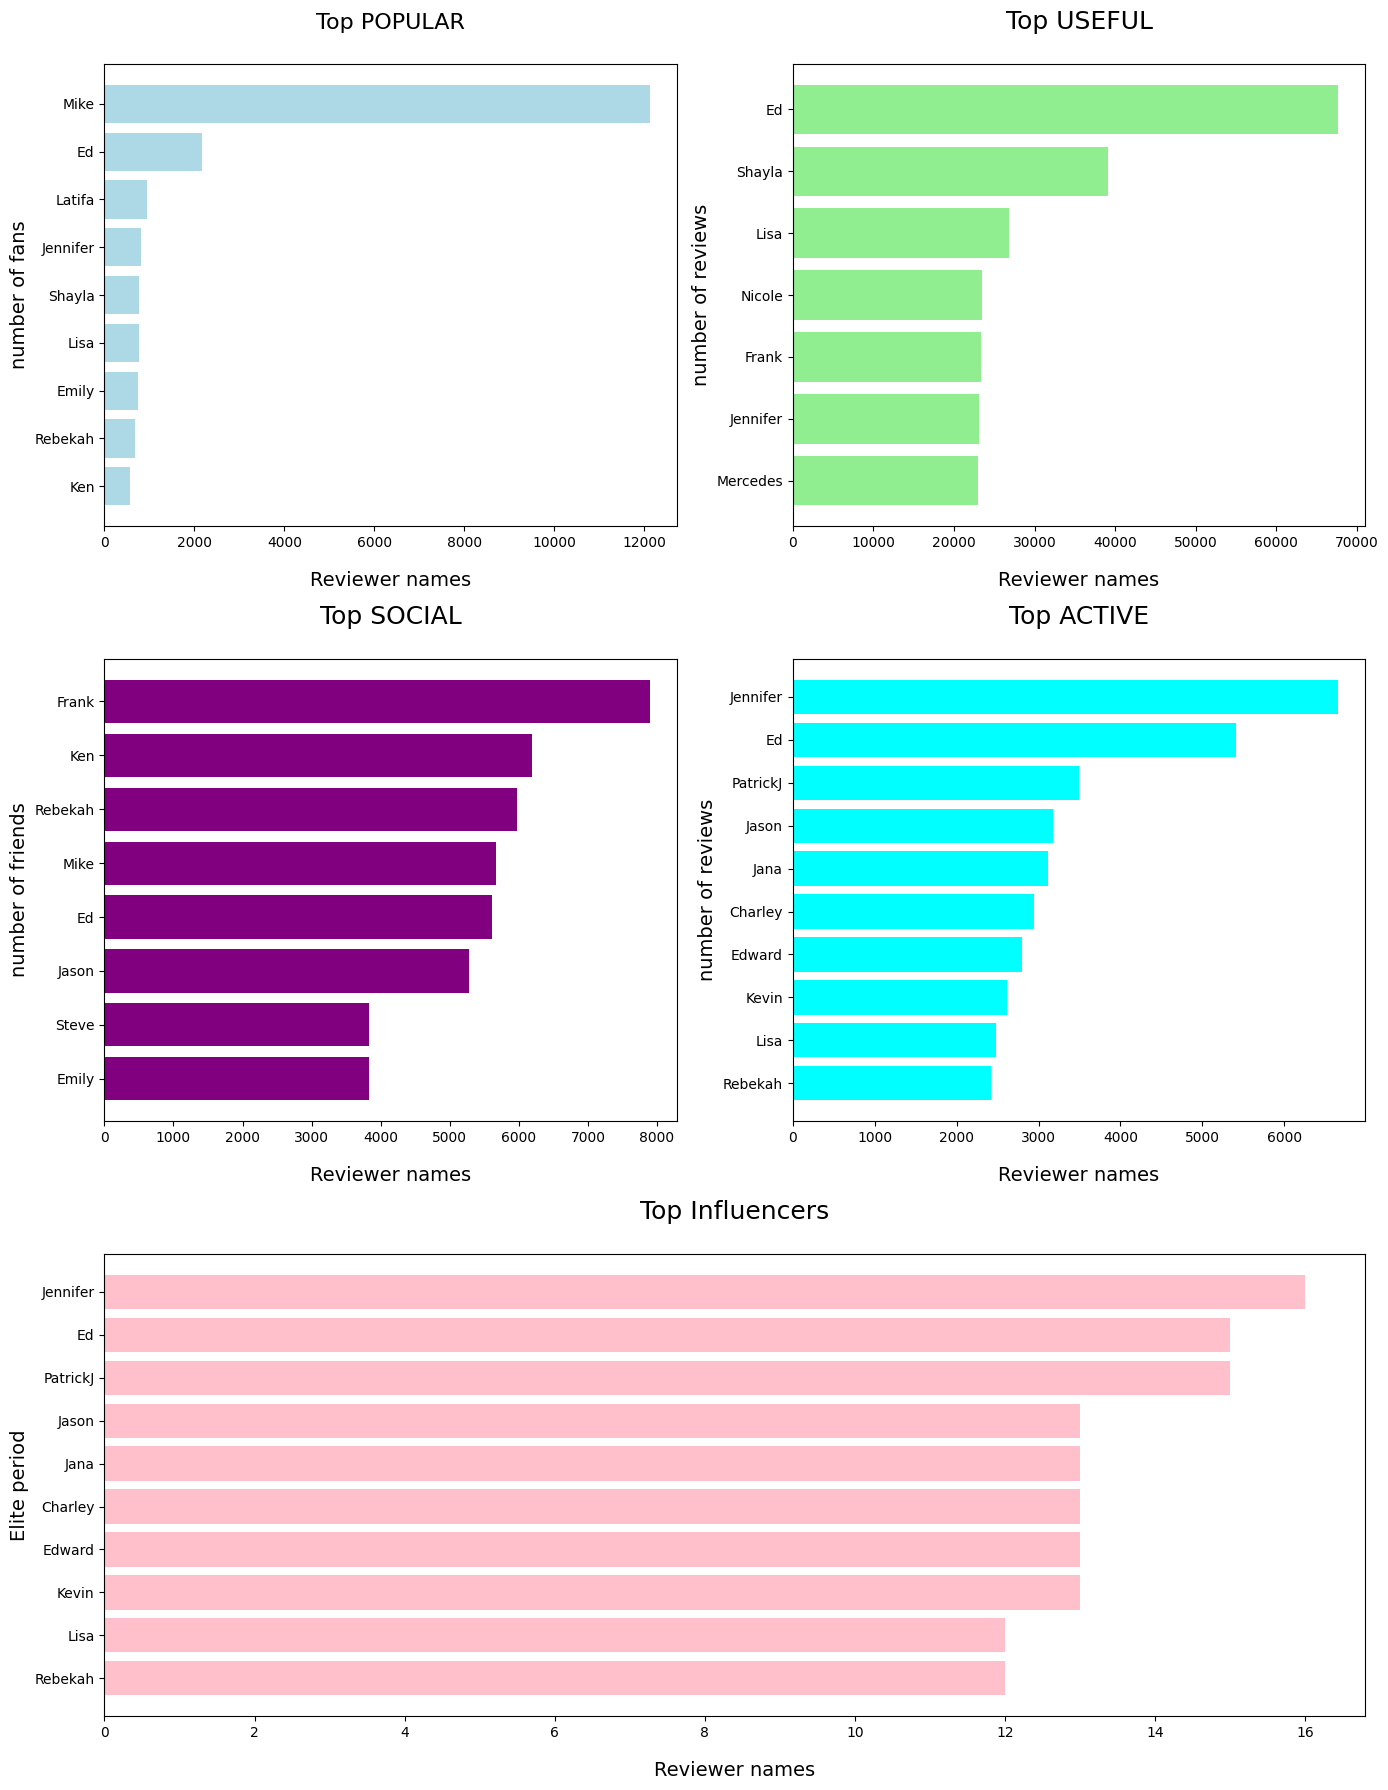

In [0]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
gridspec.GridSpec(3,2)
plt.figure(figsize=(14,18)) 

# Plotting the most popular reviewers based on the count of their fans
plt.subplot2grid((3,2), (0,0))
plt.barh(fans['name'][-10:],fans['fans'][-10:],color='lightblue')
#plt.barh(fans['name'][:10],fans['fans'][:10])

plt.title('Top POPULAR',fontsize=16, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of fans', fontsize=14)

# Plotting the 10 most popular reviewers based on the count of their useful reviews
#plt.subplot(322)
plt.subplot2grid((3,2), (0,1))
plt.barh(useful['name'][-10:],useful['useful'][-10:],color='lightgreen')

plt.title('Top USEFUL',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of reviews', fontsize=14)

# Plotting the 10 most popular reviewers based on the count of their friends on yelp
plt.subplot(323)
plt.subplot2grid((3,2), (1,0))
plt.barh(friends['name'][-10:],friends['friend_count'][-10:],color='purple')

plt.title('Top SOCIAL',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of friends', fontsize=14)

# Plotting the 10 most popular reviewers based on the count of their reviews posted on yelp
#plt.subplot(324)
plt.subplot2grid((3,2), (1,1))
plt.barh(review_total['name'][-10:],review_total['review_count'][-10:],color='cyan')

plt.title('Top ACTIVE',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of reviews', fontsize=14)

# Plotting the 10 most popular reviewers based on the ratio of their useful reviews to total reviews
#plt.subplot(325)

plt.subplot2grid((3,2),(2,0),colspan=2, rowspan=2)
plt.barh(review_total['name'][-10:],elite['elite_count'][-10:],color='pink')
plt.title('Top Influencers',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('Elite period', fontsize=14)


# comment out the following line and run cell to see the difference it makes
plt.tight_layout() # makes sure there is no overlap in plots 
plt.show()

In [0]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
userDF=spark.createDataFrame(user_pdf1) 
userDF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/user_influencer.json")



In [0]:
userJsonPath = "/FileStore/tables/Project_Data_Extract/user_influencer.json"
users_DF = (spark.read.option("inferSchema", True).json(userJsonPath))
user_pdf=users_DF.toPandas()